# Stance Classification In Tweets

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Convolution2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from statsmodels.graphics.mosaicplot import mosaic
tf.keras.optimizers.RMSprop
get_ipython().run_line_magic('matplotlib', 'inline')
import os
tf.__version__

Using TensorFlow backend.


'2.1.0'

## Upload and unzip data file

In [2]:
import zipfile
with zipfile.ZipFile('./StanceDataset.zip', 'r') as zip_ref:
 zip_ref.extractall('./')

## Reading training data

In [3]:
train = pd.read_csv('./StanceDataset/train.csv', index_col=None, header=0, engine='python' )

## Understand Data and Preprocessing

In [4]:
train.shape

(2914, 5)

## Checking shape of training data and creating a plot to analyse Bias in data

In [5]:
#grouping
shape_data_group_target= train.groupby(["Target"])
shape_data_group_plot_target= shape_data_group_target.count()

,Tweet,Stance,Opinion Towards,Sentiment
Target,,,,
Atheism,513,513,513,513
Climate Change is a Real Concern,395,395,395,395
Feminist Movement,664,664,664,664
Hillary Clinton,689,689,689,689
Legalization of Abortion,653,653,653,653


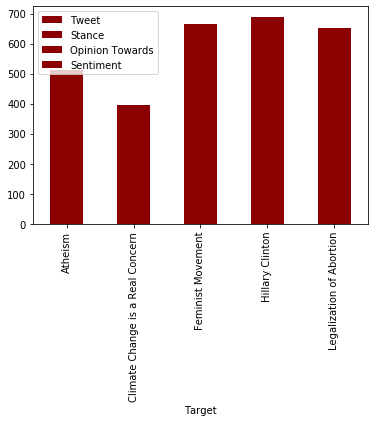

In [6]:
#plotting bar chart
shape_data_group_plot_target.plot(kind='bar',color=('darkred'))
shape_data_group_target.count()

,Tweet,Target,Opinion Towards,Sentiment
Stance,,,,
AGAINST,1395,1395,1395,1395
FAVOR,753,753,753,753
NONE,766,766,766,766


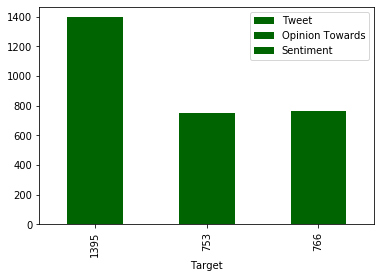

In [7]:
#grouping
shape_data_group_stance= train.groupby(["Stance"])
shape_data_group_plot_stance= shape_data_group_stance.count()
#plotting bar chart
shape_data_group_plot_stance.plot('Target',kind='bar',color=('darkgreen'))
shape_data_group_stance.count()

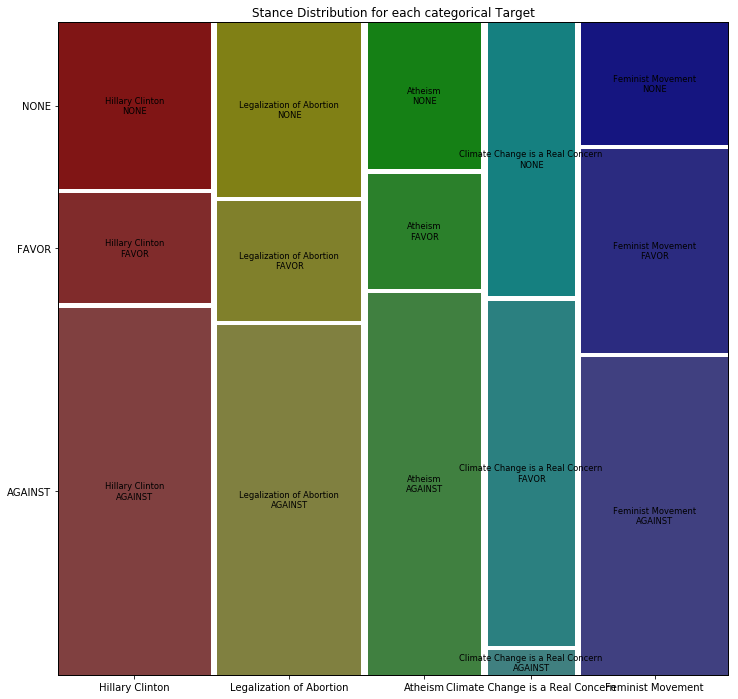

In [8]:
df1 = pd.DataFrame(train,columns=['Target','Stance'])

from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(12.0, 12.0)
mosaic(df1, ['Target', 'Stance'],gap=0.01,title='Stance Distribution for each categorical Target');


## Splitting Data into TRAIN, TEST AND VALIDATION

In [9]:

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(train,test_size = 0.2)
training_data, validation_data = train_test_split(train_data,test_size = 0.2)

# Generate two data frames for training and validation #
print('Train size: {}, Test size: {}'.format(training_data.shape[0], validation_data.shape[0] ) ) 
N_train_images = training_data.shape[0]
N_val_images = validation_data.shape[0]

Train size: 1864, Test size: 467


In [10]:
training_data.shape

(1864, 5)

In [11]:
validation_data.shape

(467, 5)

# Data cleaning and pre processing

In [12]:
train["Stance"].value_counts()

AGAINST    1395
NONE        766
FAVOR       753
Name: Stance, dtype: int64

In [13]:
train["Target"].value_counts()

Hillary Clinton                     689
Feminist Movement                   664
Legalization of Abortion            653
Atheism                             513
Climate Change is a Real Concern    395
Name: Target, dtype: int64

In [14]:
mod_data = train

In [15]:
encode = {
    "AGAINST" : 0,
    "NONE"  : 1,       
    "FAVOR" : 2,    
}

mod_data["Stance"] = mod_data["Stance"].apply(lambda x: encode[x])
mod_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,0,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,2,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,0,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,0,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,1,3. The tweet is not explicitly expressing opi...,pos


## Text cleaning

In [16]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweet_lines = list()
lines = mod_data["Tweet"].values.tolist()

for line in lines:
    # tokenize the text
    tokens = word_tokenize(line)

    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # remove puntuations
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove non alphabetic characters
    words = [word for word in stripped if word.isalpha()]

    tweet_lines.append(words)
    

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
tweet_lines[:2]

[['tedcruz',
  'and',
  'handovertheserver',
  'she',
  'wiped',
  'clean',
  'deleted',
  'emails',
  'explains',
  'dereliction',
  'of',
  'dutylies',
  're',
  'benghazi',
  'etc',
  'tcot'],
 ['hillary',
  'is',
  'our',
  'best',
  'choice',
  'if',
  'we',
  'truly',
  'want',
  'to',
  'continue',
  'being',
  'a',
  'progressive',
  'nation',
  'ohio']]